In [1]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
from scipy import stats
import env

### Question 1: 
A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a **Poisson distribution** with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

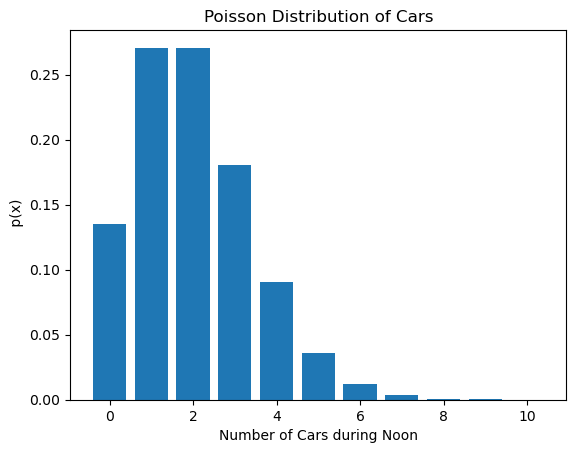

In [2]:
# the mean number of cars:
mean_cars = 2

# create the range for the graph
x = np.arange(0,11)

# probability a value is equal to a point. Discrete Data: cars cannot be broken in parts.
# poisson distrubition: .poisson: A poisson discrete random variable.
y  = stats.poisson(mean_cars).pmf(x)

# create the bar chart:
plt.bar(x, y)
plt.xlabel('Number of Cars during Noon')
plt.ylabel(' p(x)')
plt.title('Poisson Distribution of Cars')
plt.show()

In [3]:
# a. What is the probability that no cars drive up in the noon hour?

# Experimental Probability
# np.random: will give random variables
# poisson(discrete_number, range) == set_value (will give boolean list)
#.mean() will get the mean of the True(when the variable is eqaul to 0)
(np.random.poisson(mean_cars, 10_000) == 0).mean()

0.1385

In [4]:
# Theoretical Probability
# .poisson(distinct_variable).pmf(requested_variable: no cars)
stats.poisson(mean_cars).pmf(0)

0.1353352832366127

### Graph: 

Text(3, 0.22, '$P(X = 0) = 0.135$')

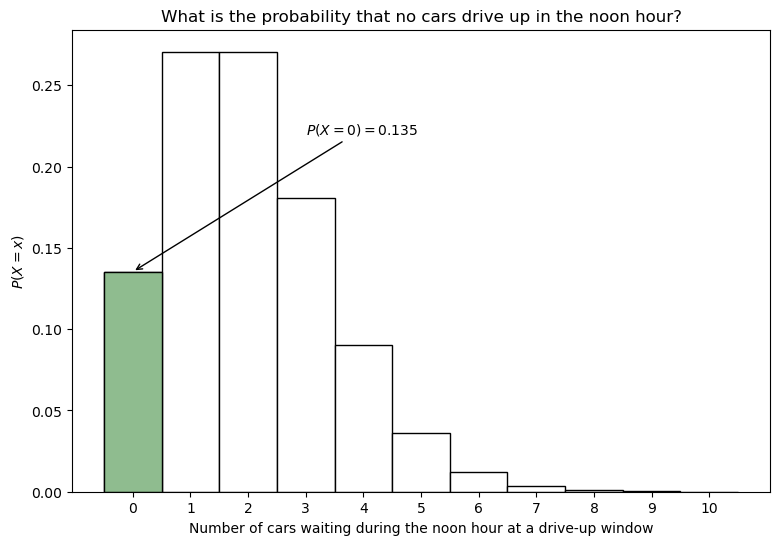

In [5]:
μ = 2
plt.figure(figsize=(9, 6))
plt.bar(
    x, 
    y, 
    edgecolor='black', 
    color='white', 
    width=1
)
plt.xticks(x)
plt.ylabel('$P(X = x)$')
plt.xlabel('Number of cars waiting during the noon hour at a drive-up window')
plt.title('What is the probability that no cars drive up in the noon hour?')
plt.bar(
    0, 
    stats.poisson(μ).pmf(0), 
    width=1, 
    color='darkseagreen', 
    edgecolor='black'
)
plt.annotate(
    f'$P(X = 0) = {stats.poisson(μ).pmf(0):.3f}$', 
    (0, stats.poisson(2).pmf(0)), 
    xytext=(3, .22), 
    arrowprops={'arrowstyle': '->'}
)

In [6]:
# b. What is the probability that 3 or more cars come through the drive through?

#Experimental Probability
(np.random.poisson(mean_cars, 10_000) >= 3).mean()

0.3218

In [7]:
# Theoretical Probability
# probabilty a value is greater than a point = .sf (have the value, want the probability)
# .poisson(distinct_varibale).sf(value. more than 2)
stats.poisson(mean_cars).sf(2)

0.32332358381693654

### Graph

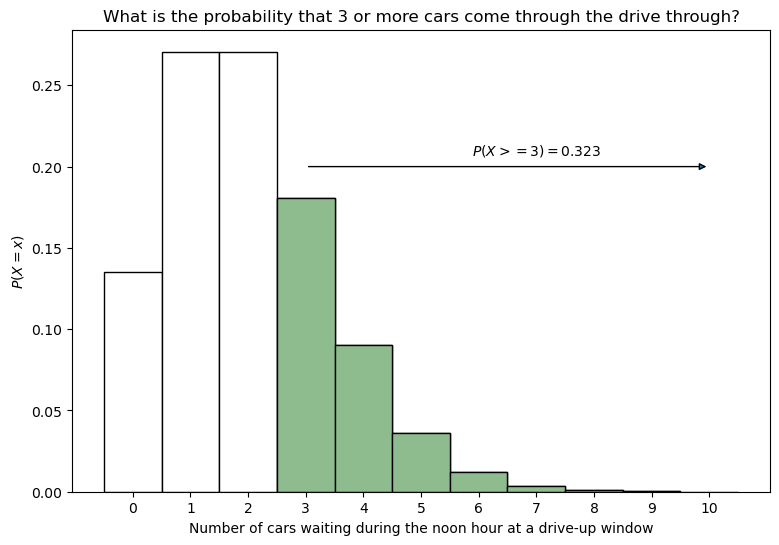

In [8]:
plt.figure(figsize=(9, 6))
plt.bar(x, y, edgecolor='black', color='white', width=1)
plt.xticks(x)
plt.ylabel('$P(X = x)$')
plt.xlabel('Number of cars waiting during the noon hour at a drive-up window')
plt.title('What is the probability that 3 or more cars come through the drive through?')

x1 = np.arange(3, 10)
y1 = stats.poisson(μ).pmf(x1)

plt.bar(x1, y1, width=1, color='darkseagreen', edgecolor='black')

plt.annotate('', xy=(3, .20), xytext=(10, .20), xycoords='data', textcoords='data', arrowprops={'arrowstyle': '<|-'})
plt.text(7, .21, f'$P(X >= 3) = {stats.poisson(μ).sf(2):.3f}$', va='center', ha='center')
plt.show()

In [9]:
# c. How likely is it that the drive through gets at least 1 car?

#Experimental Probability
(np.random.poisson(mean_cars, 10_000) >= 1).mean()

0.865

In [10]:
# Theoretical Probability
# probabilty a value is less than or equal to a point: .sf (have the value, want the probability)
stats.poisson(mean_cars).sf(0)

0.8646647167633873

In [11]:
#another method: 
1 - stats.poisson(mean_cars).pmf(0)

0.8646647167633873

### Graph

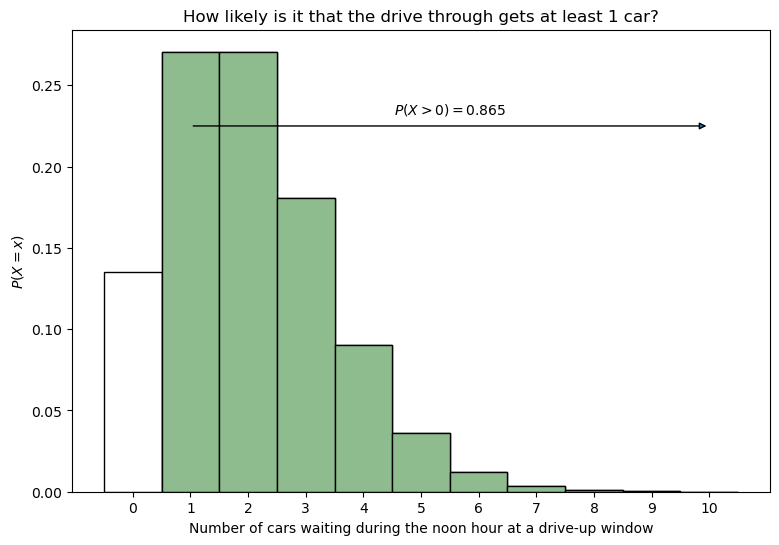

In [12]:
plt.figure(figsize=(9, 6))
plt.bar(
    x, 
    y, 
    edgecolor='black', 
    color='white', 
    width=1
)
plt.xticks(x)
plt.ylabel('$P(X = x)$')
plt.xlabel('Number of cars waiting during the noon hour at a drive-up window')
plt.title('How likely is it that the drive through gets at least 1 car?')

x1 = np.arange(1, 11)
y1 = stats.poisson(μ).pmf(x1)

plt.bar(
    x1, 
    y1, 
    width=1, 
    color='darkseagreen', 
    edgecolor='black'
)

plt.annotate(
    '', 
    xy=(1, .225), 
    xytext=(10, .225), 
    xycoords='data', 
    textcoords='data', 
    arrowprops={'arrowstyle': '<|-'}
)
plt.text(
    5.5, 
    .235, 
    f'$P(X > 0) = {stats.poisson(μ).sf(0):.3f}$', 
    va='center', 
    ha='center')
plt.show()


### Question 2:
Grades of State University graduates are **normally distributed** with a mean of 3.0 and a standard deviation of .3. Calculate the following:

### Graph

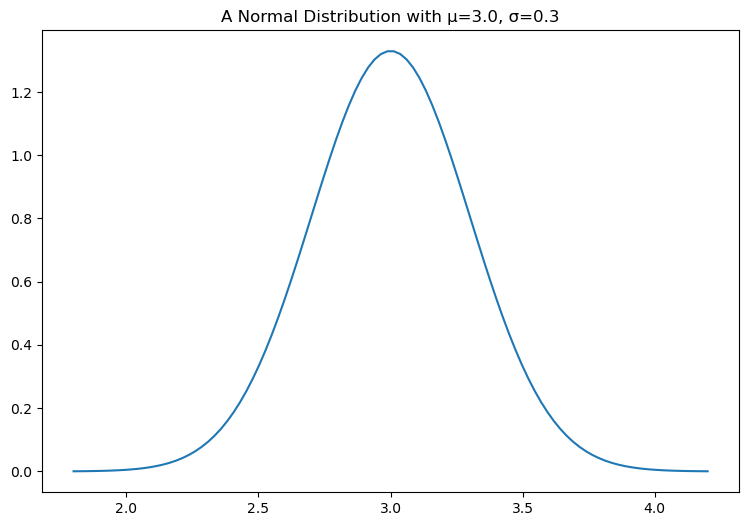

In [13]:
μ = 3.0
σ = 0.3
grade = stats.norm(μ, σ)

x = np.linspace(μ - 4*σ, μ + 4*σ, 100)
y = grade.pdf(x)

plt.figure(figsize=(9, 6))
plt.plot(x, y)
plt.title(f'A Normal Distribution with μ={μ}, σ={σ}')
plt.show()

In [14]:
mean_grade = 3.0
std_grade = 0.3

#normaly distrubuted: .norm(mean, standard deviation)

grade = stats.norm(mean_grade, std_grade)
grade

#### a. What grade point average is required to be in the top 5% of the graduating class?

In [15]:
# probability a value is less than or equal to a point
# .ppf: have the probability and want the value

grade.isf(.05)

3.4934560880854417

In [16]:
# opposite method
grade.ppf(0.95)

3.4934560880854417

### Graph

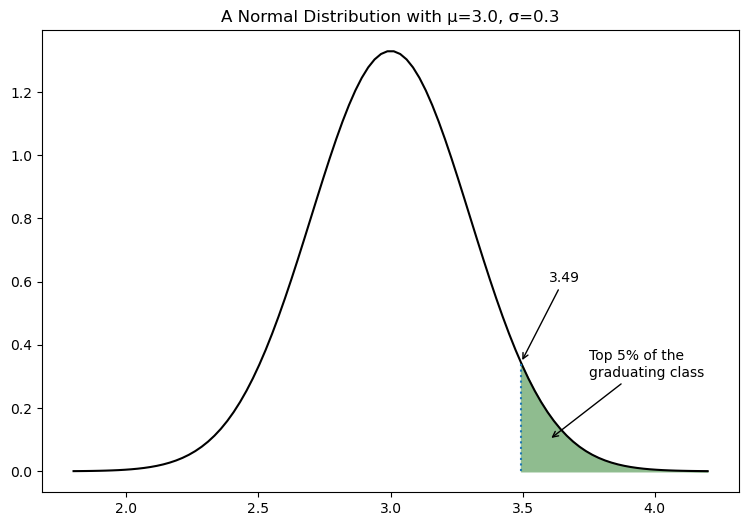

In [17]:
top_5_percent_cutoff = grade.isf(0.05)

plt.figure(figsize=(9, 6))
plt.plot(x, y, color='black')
plt.vlines(top_5_percent_cutoff, 0, grade.pdf(top_5_percent_cutoff), linestyle=':')
plt.title(f'A Normal Distribution with μ={μ}, σ={σ}')

x1 = np.linspace(top_5_percent_cutoff, μ + 4*σ)
y1 = grade.pdf(x1)

plt.fill_between(x1, y1, color='darkseagreen')

plt.annotate(f'{top_5_percent_cutoff:,.2f}', (top_5_percent_cutoff, grade.pdf(top_5_percent_cutoff)),
             xytext=(3.6, .6), arrowprops={'arrowstyle': '->'})
plt.annotate(f'Top 5% of the\ngraduating class', (3.6, .1), xytext=(3.75, .3), arrowprops={'arrowstyle': '->'})

plt.show()

#### b. What GPA constitutes the bottom 15% of the class?

In [18]:
#first method
grade.ppf(.15)

2.689069983151863

In [19]:
# opposite method
grade.isf(.85)

2.689069983151863

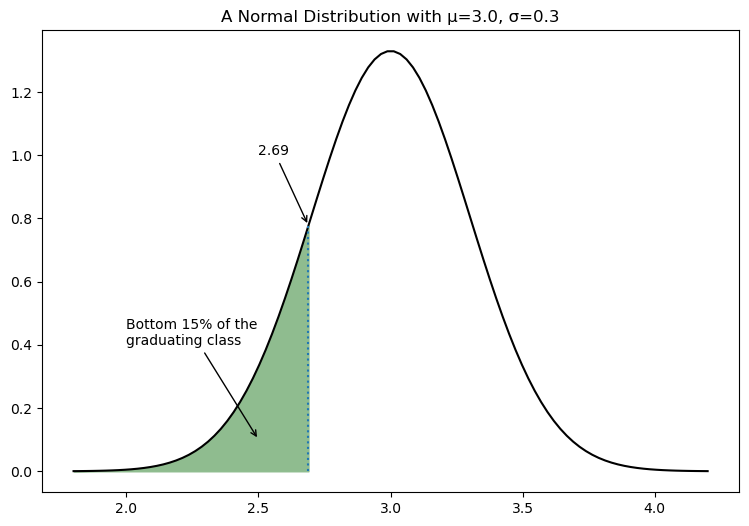

In [20]:
bottom_15_percent_cutoff = grade.ppf(0.15)

plt.figure(figsize=(9, 6))
plt.plot(x, y, color='black')
plt.vlines(bottom_15_percent_cutoff, 0, grade.pdf(bottom_15_percent_cutoff), linestyle=':')
plt.title(f'A Normal Distribution with μ={μ}, σ={σ}')

x1 = np.linspace(μ - 4*σ, bottom_15_percent_cutoff)
y1 = grade.pdf(x1)

plt.fill_between(x1, y1, color='darkseagreen')

plt.annotate(f'{bottom_15_percent_cutoff:,.2f}', (bottom_15_percent_cutoff, grade.pdf(bottom_15_percent_cutoff)),xytext=(2.5, 1.0), arrowprops={'arrowstyle': '->'})
plt.annotate(f'Bottom 15% of the\ngraduating class', (2.5, .1), xytext=(2, .4), arrowprops={'arrowstyle': '->'})

plt.show()

#### c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship? 

In [21]:
# 1st declie: 0-10 percentile
# 2nd decile: 10-20 percentile
# 3rd decile: 20-30 percentile

range_of_gpa = grade.ppf([.2, .3])
range_of_gpa

(range_of_gpa[0] < 2.8) and (range_of_gpa[1] > 2.8)

True

#### d. If I have a GPA of 3.5, what percentile am I in?

In [22]:
grade.sf(3.5)

0.0477903522728147

In [23]:
print(f'You are in the {(grade.cdf(3.5).round(2)*100)}th percentile.')

You are in the 95.0th percentile.


In [24]:
grade.cdf(3.5)

0.9522096477271853

In [25]:
print(f'You are in the {(grade.cdf(3.5).round(2))*100}th percentile.')

You are in the 95.0th percentile.


### Question 3: 
A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

Binomial: .binom(k- 1, n, p)
- k = number of successes
- n = total number of trials or observations
- p = the probability of sucess in a single trial

In [26]:
# parameters:

k = 97
n = 4_326
p = 0.02

# need to use the binomial probability formula
stats.binom(n, p).sf(k-1)

0.13975823631416448

In [27]:
#another method: 
p = 0.02 #sucess rate
n_trials = 4326 #number of trials
click_throughs = stats.binom(n_trials, p)
click_throughs.sf(96)

0.13975823631416448

### Question 4:
You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

a. What is the probability that at least one of your first 60 answers is correct?

In [30]:
n = 60 #First 60 questions/trials
p = 0.01 #1/100 b'c it's some random number between 0 & 1

stats_hmwk = stats.binom(n, p)
n, p

(60, 0.01)

In [31]:
# pass more than 0 questions
stats_hmwk.sf(0)

0.45284335760923855

### Question 5: 
The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [34]:
# given information:
# 90% chance 3 active cohorts of 22 students visit the break area
# 3% that they will clean the break area

#have to find out have many students actually visit the break area:
# percent * students * 3 active cohorts
n_stud = round(.9 * 22 * 3)
n_stud

59

In [35]:
#probability: 0.03
p = 0.03

a. How likely is it that the break area gets cleaned up each day?

In [38]:
cleaning = stats.binom(n_stud, p)
# cleaned more than 0 times
cleaning.sf(0)

0.8342199288437352

### Graph:

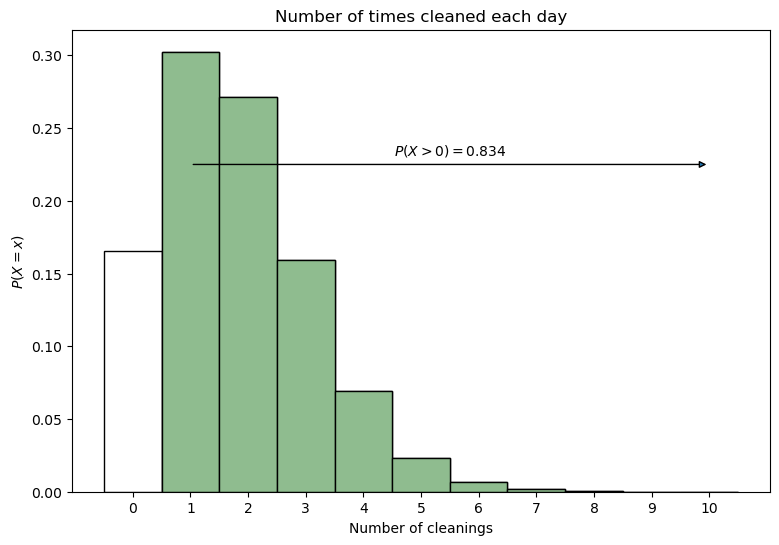

In [42]:
x = np.arange(0, 11)
y = stats.binom(n_stud, p).pmf(x)

plt.figure(figsize=(9, 6))
plt.bar(
    x, 
    y, 
    edgecolor='black', 
    color='white', 
    width=1
)
plt.xticks(x)
plt.ylabel('$P(X = x)$')
plt.xlabel('Number of cleanings')
plt.title('Number of times cleaned each day')

x1 = np.arange(1, 11)
y1 = stats.binom(n_stud, p).pmf(x1)

plt.bar(
    x1, 
    y1, 
    width=1, 
    color='darkseagreen', 
    edgecolor='black'
)

plt.annotate(
    '', 
    xy=(1, .225), 
    xytext=(10, .225), 
    xycoords='data', 
    textcoords='data', 
    arrowprops={'arrowstyle': '<|-'}
)
plt.text(
    5.5, 
    .235, 
    f'$P(X > 0) = {stats.binom(n_stud, p).sf(0):.3f}$', 
    va='center', 
    ha='center')
plt.show()

b. How likely is it that it goes two days without getting cleaned up?

In [48]:
# This means the number of possible students avail to clean has doubled beacuse it is happening over two days
n = n_stud * 2 
nocleaning = stats.binom(n, p)
n, p

(118, 0.03)

In [49]:
# we have the probability and want the value to equal a point: .pmf (discrete data)
# want the cleaning to be zero times
nocleaning.pmf(0)

0.027483031992576134

In [52]:
# class review:
print(f"It is {round(nocleaning.pmf(0),5)*100}% likely that the breakroom goes two days without cleaning.")

It is 2.748% likely that the breakroom goes two days without cleaning.


c. All week?

In [55]:
n = n_stud * 5 
p = 0.03
nocleaning_five = stats.binom(n, p)
n, p

(295, 0.03)

In [56]:
nocleaning_five.pmf(0)

0.00012521651388091245

In [57]:
print(f"It is {round(nocleaning_five.pmf(0),5)*100}% likely that the breakroom goes five days without cleaning.")

It is 0.013% likely that the breakroom goes five days without cleaning.


### Question 6:
You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is **normally distributed** with a **mean of 15 and standard deviation of 3**. If it takes **2 minutes** for each person to order, and **10 minutes** from ordering to getting your food, what is the likelihood that you have at least **15 minutes** left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

a. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class?

Class notes: <br>
What we know:
Units of measurement: Are not the same, so conversion will be needed!

(60 min lunch) - (15 mins to eat) = 45 mins remaining

(45 mins left) - (2 mins to order) - (10 mins to get food) = 33 mins avail wait-time

Mean (μ) : 15 PEOPLE, but we are measuring TIME

This is also the case with the STDDEV (σ) of 3 people

To address this, we will multiple the people by their respective order time

In [58]:
mean_lunch = 15 * 2 
std_lunch = 3 * 2

total_lunch_time = 60 #mins
eat_time = 15 #mins
order_time = 2 #mins
cook_time = 10 #mins

max_wait = (total_lunch_time - eat_time) - order_time  - cook_time
max_wait

33

In [59]:
#We want the probability you have AT LEAST 15 mins to eat

stats.norm(mean_lunch, std_lunch).cdf(max_wait)

0.6914624612740131

### Question 7: 
Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [60]:
from pydataset import data
import env

In [63]:
emp_url = env.get_db_url('employees')
salaries = pd.read_sql('select * from salaries where to_date > curdate()', emp_url)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [71]:
#find the average salary of current employees, along with the standard deviation.
mean_salaries = salaries.salary.mean()
std_salaries = salaries.salary.std()

#### a. What percent of employees earn less than 60,000?

In [72]:
# have the value want the probability(less than or equal too)
stats.norm(mean_salaries, std_salaries).cdf(60000)

0.24385742480214434

#### b. What percent of employees earn more than 95,000?

In [73]:
# have the value, want the pobability to be greater than a point
stats.norm(mean_salaries, std_salaries).sf(95000)

0.09208819199804058

#### c. What percent of employees earn between 65,000 and 80,000?

In [75]:
# class review
# This mean I want:
# More than 65k
# Less than 80k

(stats.norm(mean_salaries, std_salaries).cdf(80000)) - (stats.norm(mean_salaries, std_salaries).cdf(65000))

0.33506056854466654

In [76]:
# another method: 
np.diff(stats.norm(mean_salaries, std_salaries).cdf([65000,80000]))

array([0.33506057])

In [77]:
stats.norm(mean_salaries, std_salaries).cdf([65000,80000])

array([0.34270292, 0.67776349])

In [80]:
# another way
( 1 - (stats.norm(mean_salaries, std_salaries).cdf(65000))) - stats.norm (mean_salaries, std_salaries).sf(80000)

0.3350605685446666

#### d. What do the top 5% of employees make?

In [82]:
# given percentatge want value
stats.norm(mean_salaries, std_salaries).isf(.05)

100484.64454102777

In [84]:
# another way: 
stats.norm(mean_salaries, std_salaries).ppf(.95)

100484.64454102775

<Axes: >

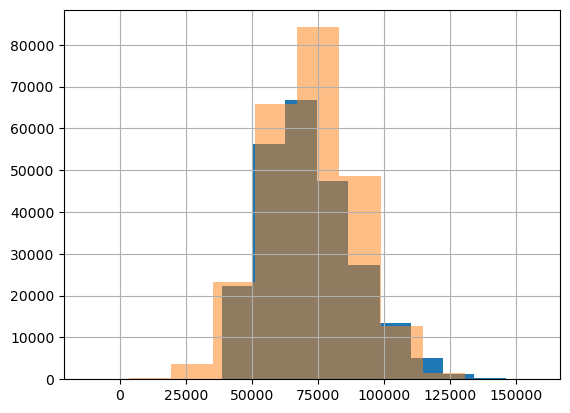

In [85]:
# histogram of actual vs theoretical salary distribution
salaries.salary.hist()
pd.Series(stats.norm(mean_salaries, std_salaries).rvs(240124)).hist(alpha = 0.5)